#### $\text{BioStat 558: Homework II}$
#### $\text{Madison Sanchez-Forman}$

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from tabulate import tabulate

from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

np.random.seed(123)
sns.set_theme(font='Times New Roman', palette='magma')
palette = sns.color_palette('magma')

#### $\text{Problem 1}$
<!-- 1 a -->
$\text{a) Minimizing least squares is the procedure that allows us to find estimates of the coefficients in linear regression such that our predictions}$
$\text{are as close to the actual data points as possible. This creates the line of best fit. To find these coefficients, we want to minimize the distance between our predicted}$
$\hat{Y}\text{ given an observation X, and the actual (X,Y) from the training set.}$
$\text{This is often done by minimizing the residuals from our model, or the difference between}$
$\text{our models prediction, }\hat{Y} \text{, and the actual Y of the training response variable.}$

$\text{Let }Y=\beta_0 + \beta_1 X_1 + \epsilon_{1} \wedge Y=\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon_{2}$

$\text{Then, }$

$RSS_1=\sum_{i=1}^{n}e_1 ^2 =(y_i - \hat{\beta_0} - \hat{\beta_1}x_1)^2$

$RSS_{12} =\sum_{i=1}^{n}e_{1i}^2=\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_1 - \hat{\beta_2}x_2)^2$

$\text{We can see that the first model is a more restrictive version of the second. In the second model, if }\beta_2=0\text{ minimizes }RSS_{12}$ $\text{then model 2 will find that. In contrast, model 1 can be thought of as ignoring the second feature } X_2 \text{ no matter what, leaving the possibility that}$
$\text{there exists a different } \beta_2 \text{that would allow for the RSS to be even smaller. Similarly, we know that the RSS of the more flexible model will be}$
$\text{at least as small as the less flexible model because of this additional parameter.}$

$\therefore RSS_{12} \leq RSS_1$


<!-- 1 b -->
$\text{b) } R^2 \text{ represents the proportion of variance explained by the fitted model. Values close to 0 indicate that the regression is not explaining the variance}$
$\text{in the response variable, and values close to 1 indicate the opposite.}$

$R^2 := 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{f}({x_i}))^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} = 1 -\frac{RSS}{TSS}$

<!-- rss = actual - predicted
tss = actual - mean -->
$\text{RSS we saw in the previous problem, and represents the amount of variability left } \underline{unexplained} \text{ after pefroming regression.}$
$\text{Mathematically, the actual values minus the predicted values from the model.}$
$\text{In contrast, TSS represents the } \underline{inherent} \text{ variability in the response Y. This means that TSS will be the same for both models.}$
$\text{Or, the actual values minus the mean values.}$

$\text{Earlier we proved that the model with two features, } X_1 \wedge X_2 \text{will have at least the same amount or less variability explained}$
$\text{as a model with only } X_1 \text{ when trained on the same data. Therefore, we know that for the model with the additional feature, } R^2$ 
$\text{ will be greater than or equal to the }R^2 \text{of the model with a single feature. In other words, adding more features will never reduce the amount}$
$\text{of variability explained by a model with a single feature, it will only increase it}$

$\therefore R^2_1 \leq R^2_2$

<!-- 1 c --> 
$\text{c) Adding features does not inherently increase } R^2 \text{. It is only substantially increased if the additional feature includes information that signifigantly reduces RSS.}$
$\text{Otherwise, the additional features can lead the model to overfitting by reducing bias and increasing variance. Where the model performs extremely}$
$\text{well on the training data, but fails to adapt to the testing data.}$

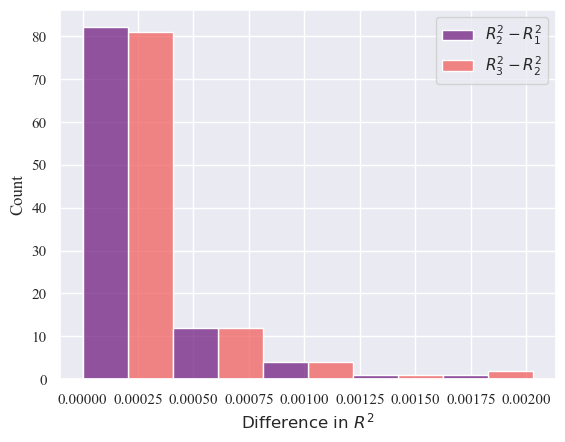

In [85]:
# 1e
def find_test_r_squared(model: LinearRegression, 
                        Y_train: 
                        np.ndarray, 
                        X_test: np.ndarray, 
                        Y_test: np.ndarray) -> float:
    """
    Helper function to calcuate R² on testing data for simulation below

    Params
    ---------
    model: 1/3 models shown below that we are currently calculating the R² for
    Y_train: training response var
    X_test: testing feature var
    Y_test: testing response var

    Returns
    -------
    R² = 1 - (RSS/TSS) of the model on the testing data 
    """
    if len(X_test.shape) == 1:
        X_test = X_test.reshape(-1, 1)

    y_pred = model.predict(X_test)
    mu_Y_train = np.mean(Y_train)

    RSS = np.sum((Y_test - y_pred)**2)
    TSS = np.sum((Y_test - mu_Y_train)**2)
    return 1 - (RSS/TSS)

def graphing(training_df: pd.DataFrame, 
             differences_df: pd.DataFrame, 
             testing_df: pd.DataFrame,
             do_testing: bool = False) -> None:
    """
    Graphs results from simulation depending on if we are interested in
    testing R² or not

    Params
    -------
    train_results: R² of the model on the training set
    test_results: R² of the model on the testing set
    diff_results: difference between the R² of models with more and less features
    do_testing: whether to calculate the R² of the model on the testing set
    """
    model_names = [
        r'$Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$',
        r'$Y_i = \beta_0 + \beta_1 X_i + \beta_2 Z_i + \epsilon_i$',
        r'$Y_i = \beta_0 + \beta_1 X_i + \beta_2 Z_i + \beta_3 \text{sin}(X_i) + \epsilon_i$'
    ]
    do_kde = True
    if do_testing:
        for i, model in enumerate(['model1', 'model2', 'model3']):
            fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))
            fig.suptitle(model_names[i])
            # Training R²
            sns.histplot(data=training_df[f'train_{model}'], ax=axes[0], kde=do_kde)
            axes[0].set_xlabel(r'$\text{Training } R^2$')
            # Testing R²
            sns.histplot(data=testing_df[f'test_{model}'], ax=axes[1], kde=do_kde)
            axes[1].set_xlabel(r'$\text{Testing } R^2$')
            axes[1].set_ylabel('')
    else:
        # Plot differences in R² of models with more and less features
        diff_data = differences_df[['diff_model2_1', 'diff_model3_2']]
        diff_data.columns = [r'$R^2_2 - R^2_1$', r'$R^2_3 - R^2_2$']
        ax = sns.histplot(data=diff_data, multiple='dodge', bins=5, palette='magma')
        ax.set_xlabel(r'$\text{Difference in } R^2$')

def f(X):
    """ True f(X) given by assignment sheet """
    return 2 - 3*X + np.random.normal(0, 2, len(X))

def simulate_once(n: int = 200, do_testing: bool = False) -> tuple[list[float], 
                                                                   list[float], 
                                                                   list[float]]:
    """
    Part 1d) of homework 2. Simulation to empirically verify the R² of the model
    with one feature is no greater than the R² of the model with two or more features.

    Params
    -------
    n: number of observations in the training set
    do_testing: whether to calculate the R² of the model on the testing set

    Returns
    -------
    r2_train: R² of the model on the training set
    r2_test: R² of the model on the testing set
    differences: difference between the R² of models with more and less features
    """
    X_train = np.random.normal(0, 3, n)
    Z_train = np.random.exponential(1/4, n)
    Y_train = f(X_train)
    
    # Model 1: Yi = β0 + β1Xi + ϵi
    model1 = LinearRegression()
    model1.fit(X_train.reshape(-1, 1), Y_train)
    train_r2_1 = model1.score(X_train.reshape(-1, 1), Y_train)
    
    # Model 2: Yi = β0 + β1Xi + β2Zi + ϵi
    X2_train = np.column_stack((X_train, Z_train))
    model2 = LinearRegression()
    model2.fit(X2_train, Y_train)
    train_r2_2 = model2.score(X2_train, Y_train)
    
    # Model 3: Yi = β0 + β1Xi + β2Zi + β3 sin(Xi) + ϵi
    X3_train = np.column_stack((X_train, Z_train, np.sin(X_train)))
    model3 = LinearRegression()
    model3.fit(X3_train, Y_train)
    train_r2_3 = model3.score(X3_train, Y_train)
    
    r2_train = [train_r2_1, train_r2_2, train_r2_3]
    differences = [train_r2_2 - train_r2_1, train_r2_3 - train_r2_2]

    r2_test = []
    if do_testing:
        X_test = np.random.normal(0, 3, n)
        Z_test = np.random.exponential(1/4, n)
        Y_test = f(X_test)
        test_r2_1 = find_test_r_squared(model1, Y_train, X_test, Y_test)
        
        X2_test = np.column_stack((X_test, Z_test))
        test_r2_2 = find_test_r_squared(model2, Y_train, X2_test, Y_test)
        
        X3_test = np.column_stack((X_test, Z_test, np.sin(X_test)))
        test_r2_3 = find_test_r_squared(model3, Y_train, X3_test, Y_test)
        
        r2_test = [test_r2_1, test_r2_2, test_r2_3]
    
    return r2_train, r2_test, differences

        
def run_simulation(b=100, do_testing=False) -> None:
    """
    Runs the simulation b times and stores the results in a dictionary.
    Then calls graphing function.

    Params
    -------
    b: number of simulations to run
    do_testing: whether to calculate the R² of the model on the testing set
    """
    training_r2 = {
    'train_model1': [],
    'train_model2': [],
    'train_model3': [],
    }
    testing_r2 = {
        'test_model1': [],
        'test_model2': [],
        'test_model3': []
    }
    differences = {
        'diff_model2_1': [],
        'diff_model3_2': []
    }
    for _ in range(b):
        r2_train, r2_test, diffs = simulate_once(do_testing=do_testing)
        training_r2['train_model1'].append(r2_train[0])
        training_r2['train_model2'].append(r2_train[1])
        training_r2['train_model3'].append(r2_train[2])
        
        if do_testing:
            testing_r2['test_model1'].append(r2_test[0])
            testing_r2['test_model2'].append(r2_test[1])
            testing_r2['test_model3'].append(r2_test[2])
            
        differences['diff_model2_1'].append(diffs[0])
        differences['diff_model3_2'].append(diffs[1])
    training_df = pd.DataFrame(training_r2)
    differences_df = pd.DataFrame(differences)
    testing_df = None
    if do_testing:
        testing_df = pd.DataFrame(testing_r2)
    graphing(training_df, differences_df, testing_df, do_testing)
run_simulation(do_testing=False)

$\text{In 1b) we established that adding more features will never decrease the amount of variance explained by the model, only increase it.}$
$\text{Here, we plotted the difference between the} R^2 \text{ values of three different models of increasing complexity. Notably, the difference between the }$
$R^2 \text{ of different models is most often 0, or slightly larger than, but it is never less than 0. Meaning the values may slightly increase for some instances}$
$\text{of the simulation, but not signifigantly and they do not decrease from the simplest model }(R^2_{1}) $

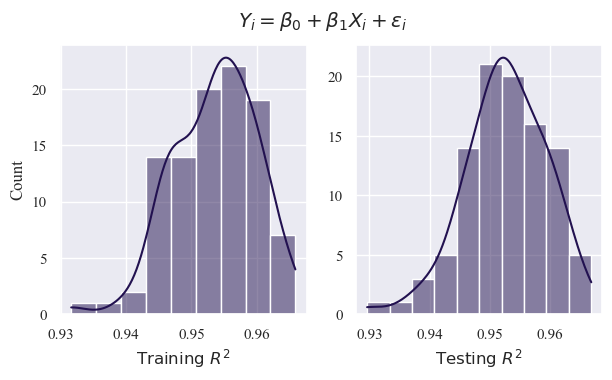

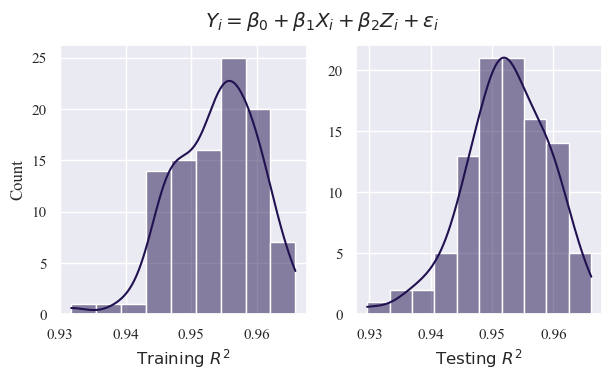

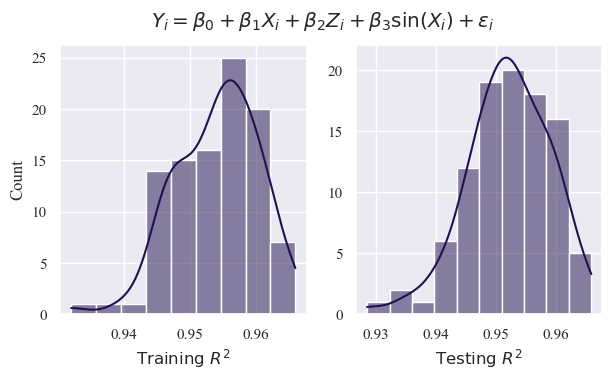

In [86]:
# e) Calculate test R2 
run_simulation(do_testing=True)

$\text{f) Here we can see through these histograms that increasing model complexity is not having a signifigant impact on } R^2.$
$\text{In the first graph, we can see both }R^2 \text{are very similar for training and testing, which indicates that this model is not over}$
$\text{ or under fitting. If this were underfitting, we would see a low training and testing score and if it were overfitting we would see a}$
$\text{high training score but low testing. This shows us that the linear model has a good bias-variance tradeoff for our dataset.}$

$\text{Furthermore, in the last two models. We see very similar distributions for training and testing of both models. Specifically, }$
$\text{The training }R^2 \text{of the last two models is a indentical distribution. Since we know that the true model is: }$
$Y = 2 - 3*X_i + \epsilon_i$
$\text{We know that X has a linear relationship with Y. In the final two models, we add terms that are not at all relevant to the model,}$ 
$\text{therefore, we do not see any added benefit from adding these variables to our model.}$

#### $\text{Problem 2}$

In [87]:
# read in data
redwine = pd.read_csv('winequality-red.csv')
print(f'Minimum quality: {redwine["quality"].min()}')
print(f'Maximum quality: {redwine["quality"].max()}')
median_quality = np.median(redwine["quality"]).astype(int)
print(f'Median quality: {median_quality}')

# median of red wine quality is 6 => quality < 6 is 'bad', quality >= 6 'good'
bad_mask = redwine['quality'] < median_quality
redwine.loc[bad_mask, 'binary quality'] = 'bad'
redwine.loc[~bad_mask, 'binary quality'] = 'good'
redwine.head(1)

Minimum quality: 3
Maximum quality: 8
Median quality: 6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [88]:
# checking that we have enough of each class
assert len(redwine['binary quality'] == 'good') > 20 and len(redwine['binary quality'] == 'bad') > 20
chosen_cols = ['pH', 'residual sugar', 'binary quality']
redwine = redwine[chosen_cols]

# Splitting data into 25% test and 75% training
X = redwine.iloc[:, 0:2]
y = redwine.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

$\text{a) I chose the Wine Quality Dataset from Kaggle. More specifically, the subset I am looking at is the red wine dataset.}$
$\text{The original dataset ranks the quality of the red wine from 0-10. Upon inspecting this subset, I found that the minimum quality ranking was 3,}$
$\text{and the maximum was 8. So I calculated the median of the quality category to be used as the cutoff for which a wine is remapped to either}$
$\text{good (1) or bad (0)}$

$\text{The features that I chose to look at are: pH and residual sugar.}$
$\text{I will be trying to predict if a wine is 0 (bad) or 1 (good. i.e. above the median quality) based off of its pH and residual sugar levels.}$
$\text{In summar, our the class we are trying to predict is } K \in \{\text{good, bad}\} \text{ using } p=\{ \text{pH, residual sugar}\} \text{ features.}$

In [89]:
def plot_classification_results(y_train, 
                                predicted_labels, 
                                X_train, 
                                title):
    """ 
    Will be used to plot classification results of following algorithms 
    Make a plot with X1 and X2, observations dispalyed according to their class labels.
    indicate which observations are correcrly classified.

    Params
    -------
    y_train: training response variable
    predicted_labels: predicted labels from the model
    X_train: training features
    title: title of the plot
    """
    incorrect = (y_train != predicted_labels)

    num_incorrect = len([x for x in incorrect if x == True])
    train_error = num_incorrect/len(predicted_labels)

    ax = sns.scatterplot(x=X_train['pH'], 
                        y=X_train['residual sugar'],
                        hue=y_train,
                        palette='magma',
                        alpha=1,
                        style=incorrect)
    
    plt.xlabel('pH')
    plt.ylabel('Residual Sugar')
    plt.title(f'{title} - Wine Quality Classification')
    handles, labels = ax.get_legend_handles_labels()
    mapping = {'bad': 'Bad', 'good': 'Good', 'False': 'Correct', 'True': 'Incorrect'}
    new_labels = [mapping[label] for label in labels]
    plt.legend(handles, new_labels,
              title='Wine Quality Classes',
              bbox_to_anchor=(1.05, 1))
    
    print(f"Train Error: {train_error:.2f}")


Train Error: 0.47


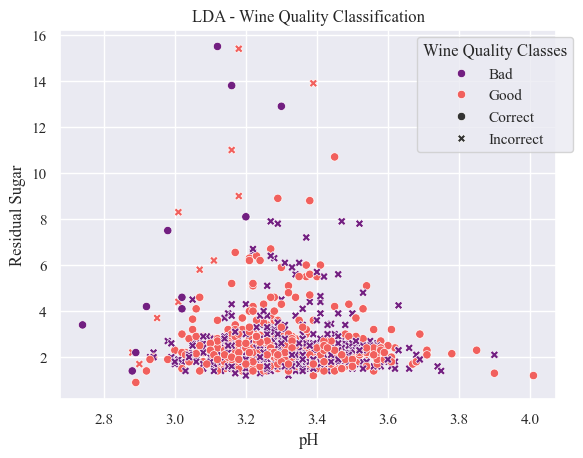

In [90]:
"""
b) Fit an LDA model to the training data. 
"""
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)
predicted_labels = lda.predict(X_train)
plot_classification_results(y_train,
                            predicted_labels,
                            X_train,
                            title='LDA')

Train Error: 0.34


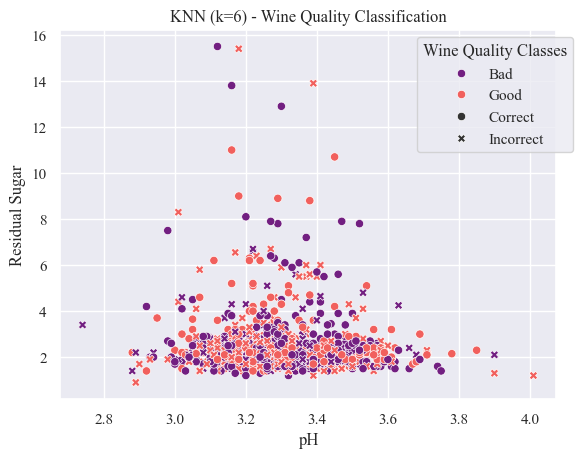

In [91]:
"""
c) Fit a KNN Classifier using k = 6
"""
k=6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
predicted_labels = knn.predict(X_train)
plot_classification_results(y_train,
                            predicted_labels,
                            X_train,
                            title='KNN (k=6)')

Train Error: 0.47


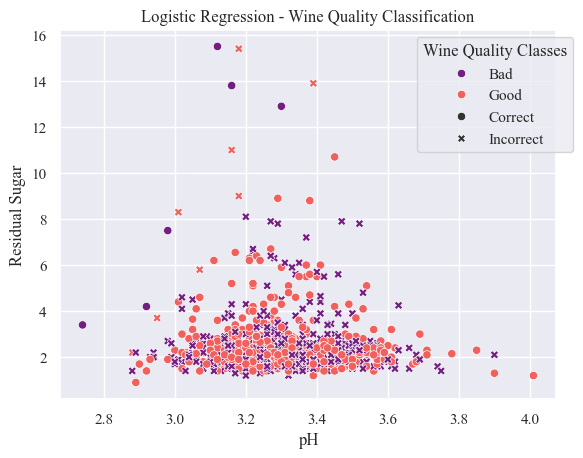

In [92]:
"""
d) Fit a Logistic Regression model to the training data. 
"""
logit = LogisticRegression()
logit.fit(X_train, y_train)
predicted_labels = logit.predict(X_train)
plot_classification_results(y_train,
                            predicted_labels,
                            X_train,
                            title='Logistic Regression')

$\text{e) the KNN classifier gave me the smallest training error.}$

$\text{f) I believe the KNN will give me the smallest training error because it is non parametric.}$
$\text{Therefore, no assumptions are made about the decision boundary. Here, we have an } n=1199 \text{ much larger than }p=2$
$\text{KNN will be able to reduce the bias while handling the variance.}$

In [93]:
def show_metrics(y_test, predicted_labels):
    """
    g) Will be used to show the metrics of the previous classification algorithms 
    Reports: 
        - proportion of correct predictions on test set
        - false negative rate
        - false positive rate
    Params
    -------
    y_test: testing response variable
    predicted_labels: predicted labels from the model
    """
    mat = confusion_matrix(y_test, predicted_labels, labels=['good', 'bad'])
    row_totals = np.sum(mat, axis=1).reshape(-1, 1) # axis = 1 -> sum rows
    mat_with_row_totals = np.hstack((mat, row_totals))

    col_totals = np.sum(mat, axis=0) # axis = 0 -> sum cols
    total_sum = np.sum(col_totals)

    bottom_row = np.append(col_totals, total_sum).reshape(1, -1)
    full_mat = np.vstack((mat_with_row_totals, bottom_row))
    table = tabulate(full_mat, 
                   headers=["Pred Bad", "Pred Good", "Total"], 
                   showindex=["Actual Bad", "Actual Good", "Total"],
                   tablefmt="fancy_grid",
                   colalign=['center', 'center', 'center', 'center'])
    print(table)
    test_error = (full_mat[0][1] + full_mat[1][0]) / full_mat[2][2]
    false_positive = full_mat[0][1] / full_mat[0][2]
    false_negative = full_mat[1][0] / full_mat[1][2]
    print(f"Test Error: ({full_mat[0][1]}+{full_mat[1][0]})/{full_mat[2][2]} = {test_error:.2f}")
    print(f"False Positive Rate: {full_mat[0][1]}/{full_mat[0][2]} = {false_positive:.2f}")
    print(f"False Negative Rate: {full_mat[1][0]}/{full_mat[1][2]} = {false_negative:.2f}")

In [94]:
print("----- Metrics for Linear Discriminant Analysis -----")
predictions_LDA = lda.predict(X_test)
show_metrics(y_test, predictions_LDA)

----- Metrics for Linear Discriminant Analysis -----
╒═════════════╤════════════╤═════════════╤═════════╕
│             │  Pred Bad  │  Pred Good  │  Total  │
╞═════════════╪════════════╪═════════════╪═════════╡
│ Actual Bad  │    214     │      8      │   222   │
├─────────────┼────────────┼─────────────┼─────────┤
│ Actual Good │    176     │      2      │   178   │
├─────────────┼────────────┼─────────────┼─────────┤
│    Total    │    390     │     10      │   400   │
╘═════════════╧════════════╧═════════════╧═════════╛
Test Error: (8+176)/400 = 0.46
False Positive Rate: 8/222 = 0.04
False Negative Rate: 176/178 = 0.99


In [95]:
print("----- Metrics for KNN (k=6) -----")
predictions_knn = knn.predict(X_test)
show_metrics(y_test, predictions_knn)

----- Metrics for KNN (k=6) -----
╒═════════════╤════════════╤═════════════╤═════════╕
│             │  Pred Bad  │  Pred Good  │  Total  │
╞═════════════╪════════════╪═════════════╪═════════╡
│ Actual Bad  │     75     │     147     │   222   │
├─────────────┼────────────┼─────────────┼─────────┤
│ Actual Good │     66     │     112     │   178   │
├─────────────┼────────────┼─────────────┼─────────┤
│    Total    │    141     │     259     │   400   │
╘═════════════╧════════════╧═════════════╧═════════╛
Test Error: (147+66)/400 = 0.53
False Positive Rate: 147/222 = 0.66
False Negative Rate: 66/178 = 0.37


In [96]:
print("----- Metrics for Logistic Regression -----")
predictions_logit = logit.predict(X_test)
show_metrics(y_test, predictions_logit)

----- Metrics for Logistic Regression -----
╒═════════════╤════════════╤═════════════╤═════════╕
│             │  Pred Bad  │  Pred Good  │  Total  │
╞═════════════╪════════════╪═════════════╪═════════╡
│ Actual Bad  │    214     │      8      │   222   │
├─────────────┼────────────┼─────────────┼─────────┤
│ Actual Good │    177     │      1      │   178   │
├─────────────┼────────────┼─────────────┼─────────┤
│    Total    │    391     │      9      │   400   │
╘═════════════╧════════════╧═════════════╧═════════╛
Test Error: (8+177)/400 = 0.46
False Positive Rate: 8/222 = 0.04
False Negative Rate: 177/178 = 0.99


$\text{g) Based on these results, I believe KNN does the best in this context although may be improved with better feature choice.}$
$\text{Both the logistic regression and LDA seemed to get very high false negative rates}$
$\text{In the context of predicting the quality of wine based off features, }$
$\text{I believe it would be best to have a balance between false positive and negative.}$
$\text{In this context, we see the best balance for the KNN classifier, as althoguh it has a slightly higher overall test error, }$
$\text{it has more reasonable false positive and negative rates.}$

#### $\text{Problem 3}$

$\text{a) If log-odds=}.7$

$\beta_0 + \beta_1 = log(\frac{P(Y=1\mid X)}{P(Y=0 \mid X)})=log(odds)=0.7$

$\therefore P(Y=1\mid X=x) = \frac{\exp(\beta_0 + \beta_1x)}{1+\exp(\beta_0 + \beta_1x)} = \frac{\exp(.7)}{1+\exp(.7)} = 0.668$

$P(Y=0\mid X=x) = 1 - P(Y=1\mid X=x) =.332$

$\text{b) If } P(Y=1\mid X=x_{1}) = p(x) = 0.3 $

$\frac{p(x)}{1-p(x)} = \frac{.3}{.7}$ 

$\therefore \ln(\frac{.3}{.7}) = -0.847$

#### $\text{Problem 4}$


$\text{a)}$
$\ln(\frac{.9}{.1})=2.197 \wedge \ln(\frac{.5}{.5})=\ln(1)=0$ 

$\beta_0 + \beta_1 x = 2.19 \wedge \beta_0 + \beta_1 (x+2) = 0$
$$
\begin{aligned}
\therefore \beta_0 + \beta_1 (x+2) = 0 \\
- (\beta_0 + \beta_1 x = 2.197) \\
2 * \beta_ 1 = - 2.197 \\
\beta_1 = -1.9085 
\end{aligned}
$$
$$
\begin{aligned}
\therefore \beta_0 = 2.197 + 1.099 x \wedge \beta_0 = 1.099 x + 2.198 \\
2.197 + 1.099 x =  1.099 x + 2.198 \\
2.197 \approx 2.198 \\
\beta_0 \approx 2.197
\end{aligned}
$$


$\text{b) Make a plot with X on horiztonal and Y on vertical, using b0 and b1 from a) }$
$\text{show P(Y=1|X=x) with a solid line and P(Y=0|X=x) with a dashed line.}$
$\text{This will be seen in the next part, I combined graphs from 4 and 5 for better visual comparison. }$


#### $\text{Problem 5}$

$\text{Let } \beta_0 = 0.2 \wedge \beta_1 = -0.7 \wedge \beta_2 = 0.6$

$\text{Display: } P(Y=1\mid X=x) = \frac{\exp(\beta_0 + \beta_1X + \beta_2 x^2)}{1+\exp(\beta_0 + \beta_1X + \beta_2 x^2)} $

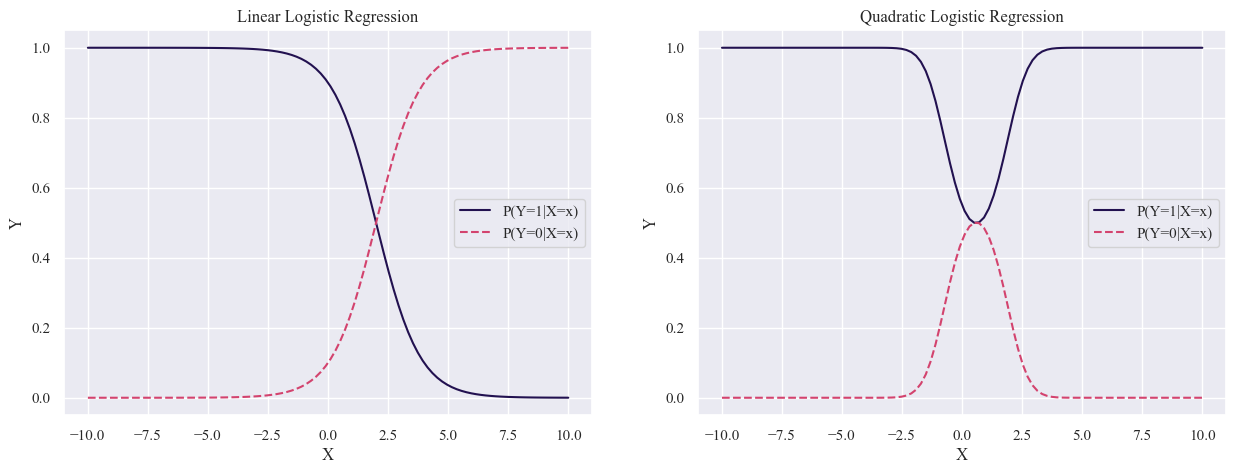

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# 4b)
beta_0, beta_1 = 2.197, -1.099
x = np.linspace(-10, 10, 100)
logistic = lambda b0, b1, x: np.exp(b0 + b1*x) / (1 + np.exp(b0 + b1*x))
y = logistic(beta_0, beta_1, x)
sns.lineplot(x=x, y=y, label='P(Y=1|X=x)', color=palette[0], ax=ax1)
sns.lineplot(x=x, y=1-y, label='P(Y=0|X=x)', linestyle='--', color=palette[3], ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y') 
ax1.set_title('Linear Logistic Regression')
ax1.legend()
# 5
beta_0, beta_1, beta_2 = 0.2, -0.7, 0.6
quad_logistic = lambda b0, b1, b2, x: np.exp(b0 + b1*x + b2*x**2) / (1 + np.exp(b0 + b1*x + b2*x**2))
y = quad_logistic(beta_0, beta_1, beta_2, x)
sns.lineplot(x=x, y=y, label='P(Y=1|X=x)', color=palette[0], ax=ax2)
sns.lineplot(x=x, y=1-y, label='P(Y=0|X=x)', linestyle='--', color=palette[3], ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Quadratic Logistic Regression')
ax2.legend();

$\text{Replacing } \beta_0 + \beta_1x \text{ with } \beta_0 + \beta_1x + \beta_2x^2 \text{ increased the flexibility of the logistic function.}$
$\text{As we have seen before, when the flexibility of a model increases,  the variance increases while bias decreases.}$
$\text{The transformation and added term of } X^2 \text{is often done when we are modeling a non linear relatioship between the}$
$\text{predictors and the response. Here, it causes the function to have the parabolic shape in the center. }$
$\text{While standard logistic function can only change dependent on the sign of } \beta_1 \text{ the quadratic logistic function can change direction;}$
$\text{it can model relationships where the probability is large at both low and high values of X, but lower in the middle.}$

#### $\text{Problem 6}$
<!-- """
Compare test error of two classifiers:
KNN w k=5
one with linear decision boudnary: LDA or multinomial logistic
goal: figure out how to generate data in two ways:
a) knn classifier will have lower test error
    i) describe how you generate data and why it lead to lower test error
    ii) plot 
        - training ovservation and decision boundary for KNN
        - test observations and " " 
        then make both plots again but for linear decision boundary classifier
            * indicate whicih observations are mislabeled
            * horizontal and vertical axes are x1 and x2
b) repeat a but for LDA having a lower test error than KNN
Scenario 5 from
From book:
- knn better when decision boundary is non linear, n large p small
- knn requires a lot of observations relative to predictors
""" -->

In [98]:
def plot_decision_boundary(model, X, ax, model_type):
    """
    Plots the decision boundary of a given model.

    Params:
    -------
        model: model to plot decision boundary of
        X: features
        ax: axis to plot on
        model_type: type of model to plot decision boundary of (knn or logistic regression)
    """
    colors = [palette[0], palette[2], palette[4]]
    custom_cmap = ListedColormap(sns.color_palette(colors))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    if model_type == 'knn':
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:  # linear classifier
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)

def plot_observations(model,
                      predictions, 
                      classifier_name,
                      X, y,
                      axis,
                      is_test):
    """
    Plots the observations of a given model according to true class and predicted class.
    Will be ran on testing and training data.

    Params:
    -------
        model: model to plot observations of
        predictions: predictions of the model
        classifier_name: name of the classifier
        X: features
        y: response
        axis: axis to plot on
        is_test: whether the observations are test or training
    Returns:
    -------
        error_rate: error rate of the model
    """
    class_colors = {
        0: palette[0],  
        1: palette[2],  
        2: palette[4]   
    }
    correct = (y == predictions).astype(str)
    num_incorrect = len([x for x in correct if x == 'False'])
    error_rate = num_incorrect/len(predictions)
    # markers = ['o' if x == 'True' else 'x' for x in correct]
    # marker_map = {'True': 'o', 'False': 'x'}
    # markers = [marker_map[str(c)] for c in correct]

    ax = sns.scatterplot(x=X[:, 0],
                        y=X[:, 1], 
                        hue=y, 
                        palette=class_colors,
                        alpha=1, 
                        style=correct,
                        style_order=['True', 'False'],
                        # markers=['o' if x == 'True' else 'x' for x in correct],
                        ax=axis)
    plot_decision_boundary(model, X, axis, 'knn')
    axis.set_xlabel('X1')
    axis.set_ylabel('X2')
    axis.set_title(f'{classifier_name} {"Test" if is_test else "Training"} Observations (n={len(X)})')
    return error_rate

def plot_train_vs_test(model,
                       test_predictions, training_predictions, 
                       classifier_name,
                       X_train, X_test,
                       y_train,y_test):
    """
    Plots the training and testing observations of a given model.

    Params:
    -------
        model: model to plot training and testing observations of
        test_predictions: predictions of the model on the test set
        training_predictions: predictions of the model on the training set
        classifier_name: name of the classifier
        X_train: training features
        X_test: test features
        y_train: training response
        y_test: test response
    Returns:
    -------
        training_error: error rate of the model on the training set
        test_error: error rate of the model on the test set
    """
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    training_error = plot_observations(model,
                      predictions=training_predictions, 
                      classifier_name=classifier_name,
                      X=X_train,
                      y=y_train,
                      axis=ax1,
                      is_test=False)
    test_error = plot_observations(model,
                      predictions=test_predictions, 
                      classifier_name=classifier_name,
                      X=X_test,
                      y=y_test,
                      axis=ax2,
                      is_test=True)
    ax2.get_legend().remove()
    handles, labels = ax1.get_legend_handles_labels()
    mapping = {'0': 'Class 1', 
               '1': 'Class 2', 
               '2': 'Class 3', 
               'True': 'Correct', 
               'False': 'Incorrect'}
    new_labels = [mapping[label] for label in labels]
    ax1.legend(handles, new_labels,
              title='Class Labels',
              loc='center',
              bbox_to_anchor=(1.15, 0.5))
    plt.tight_layout()
    return training_error, test_error

In [99]:
def generate_data_a(p=2, n_training=200, n_test=2000):
    """
    Simulates data according to Scenario 5 from the compariosn of classification algorithms
    in the textbook. 

    Params:
    -------
        p: number of predictors
        n_training: number of training observations
        n_test: number of test observations
    Returns:
    -------
        X_train: training features
        X_test: test features
        y_train: training response
        y_test: test response
    """
    percent_test = n_test / (n_training + n_test)
    X = np.random.normal(0, 1, size=(n_training + n_test, p)) 
    X1, X2 = X[:, 0], X[:, 1] # features

    # defining two non linear functions for class boundaries
    def f1(x1, x2): return 2.5 * x1**2 + 1.5 * x2**3 - 0.5
    def f2(x1, x2): return np.exp(-x2**2) + x1 * x2 - 0.5

    # convert to probabibilties with softmax
    exp_sum = 1 + np.exp(f1(X1, X2)) + np.exp(f2(X1, X2))
    probs = np.column_stack([1/exp_sum, np.exp(f1(X1, X2))/exp_sum, np.exp(f2(X1, X2))/exp_sum])

    # randomly assign class labels based on probabilities
    y = np.array([np.random.choice(3, p=prob) for prob in probs])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percent_test, random_state=42)
    return X_train, X_test, y_train, y_test

def simulate_a(k=5):
    """
    Simulates data according to Scenario 5 from the compariosn of classification algorithms
    in the textbook. This was chosen such that KNN classifier will have a lower test error rate.
    At the end, an assertion is made to ensure that the KNN classifier has a lower test error rate.
    """
    np.random.seed(42)
    X_train, X_test, y_train, y_test = generate_data_a()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_train_pred = knn.predict(X_train)
    knn_test_pred = knn.predict(X_test)

    logit = LogisticRegression()
    logit.fit(X_train, y_train)
    logit_train_pred = logit.predict(X_train)
    logit_test_pred = logit.predict(X_test)

    knn_train_error, knn_test_error =  plot_train_vs_test(knn, knn_test_pred, knn_train_pred, 'KNN', X_train, X_test, y_train, y_test)
    logit_train_error, logit_test_error = plot_train_vs_test(logit, logit_test_pred, logit_train_pred, 'Logistic Regression', X_train, X_test, y_train, y_test)
    # assert knn_test_error < logit_test_error
    print(f"KNN test error: {knn_test_error:.2f}")
    print(f"Logistic Regression test error: {logit_test_error:.2f}")

$\text{a) i) }$

KNN test error: 0.37
Logistic regression test error: 0.42


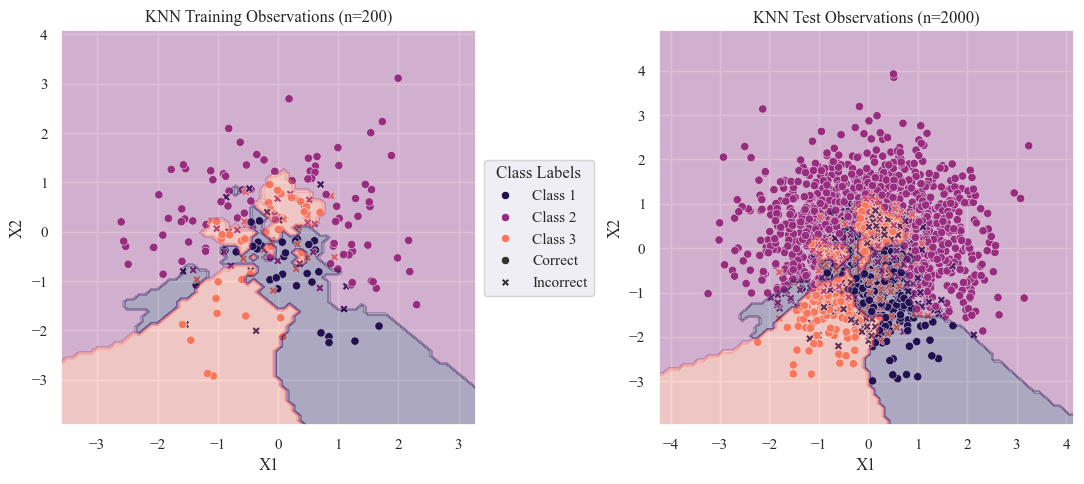

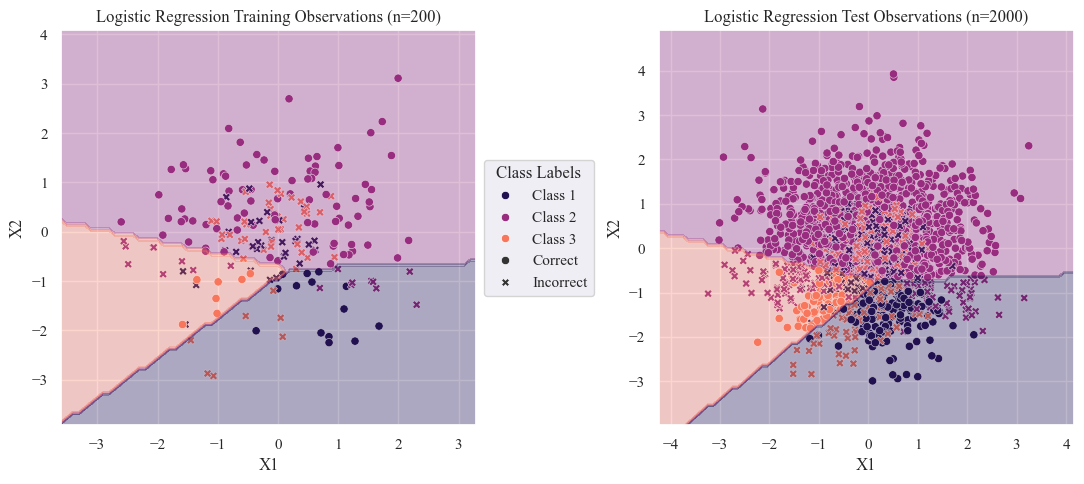

In [100]:
simulate_a()

In [101]:
def generate_data_b():
    pass
def simulate_b():
    pass